In [18]:
#Walmart_sales_forecasting_Final

In [19]:
#importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
#importing datasets
train = pd.read_csv(r'D:\Internship\walmart\train.csv')
test = pd.read_csv(r'D:\Internship\walmart\test.csv')
features = pd.read_csv(r'D:\Internship\walmart\features.csv')
stores = pd.read_csv(r'D:\Internship\walmart\stores.csv')

In [21]:
#Converting categorical values to numeric values 
mapping_store_type = {'Type': {'A':1, 'B':2, 'C':3}}
stores.replace(mapping_store_type, inplace = True)

In [22]:
#Creating dummy variables
dummy_var = pd.get_dummies(stores.Type)
stores = pd.concat([stores, dummy_var], axis=1)

In [23]:
#Evaluating missing values
from statistics import mean
features['CPI'] = features['CPI'].transform(lambda x:x.fillna(x.mean()))
features['Unemployment'] = features['Unemployment'].transform(lambda x:x.fillna(x.mean()))
features = features.fillna(0)

In [24]:
#Merging datasets
train_stores = pd.merge(train, stores, how='left')
train_final_data = pd.merge(train_stores, features, how='left')
test_stores = pd.merge(test, stores, how='left')
test_final_data = pd.merge(test_stores, features, how='left')

In [25]:
#Changing IsHoliday categorical variable to numeric
train_final_data['IsHoliday'] = [int(i) for i in train_final_data['IsHoliday']]
test_final_data['IsHoliday'] = [int(i) for i in test_final_data['IsHoliday']]

In [26]:
#sorting final datasets
train_final_data = train_final_data.sort_values(by = 'Date')
test_final_data = test_final_data.sort_values(by = 'Date')

In [27]:
#dropping unwanted columns
train_final_data = train_final_data.drop(columns='Type')
test_final_data = test_final_data.drop(columns='Type')
train_final_data = train_final_data[train_final_data['Weekly_Sales']>=0]

In [28]:
# Adding extra features
train_final_data.Date = pd.to_datetime(train_final_data.Date)
test_final_data.Date = pd.to_datetime(test_final_data.Date)
# Add column for year
train_final_data["Year"] = pd.to_datetime(train_final_data["Date"], format="%Y-%m-%d").dt.year
test_final_data["Year"] = pd.to_datetime(test_final_data["Date"], format="%Y-%m-%d").dt.year
# Add column for day
train_final_data["Day"] = pd.to_datetime(train_final_data["Date"], format="%Y-%m-%d").dt.day
test_final_data["Day"] = pd.to_datetime(test_final_data["Date"], format="%Y-%m-%d").dt.day
# Add column for week
train_final_data["Week"] = pd.to_datetime(train_final_data["Date"], format="%Y-%m-%d").dt.week
test_final_data["Week"] = pd.to_datetime(test_final_data["Date"], format="%Y-%m-%d").dt.week

In [29]:
features['IsHoliday'] = [int(i) for i in features['IsHoliday']]

In [30]:
#splitting data 
train_X = train_final_data.drop(['Weekly_Sales', 'Date', 'CPI', 'Unemployment', 'MarkDown5','MarkDown3','MarkDown4','MarkDown2', 3], axis = 1)
test_X = test_final_data.drop(['Date', 'CPI', 'Unemployment', 'MarkDown5','MarkDown3','MarkDown4','MarkDown2', 3], axis = 1)
train_y = train_final_data['Weekly_Sales']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.2, random_state = 50)

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 10, random_state = 10)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)

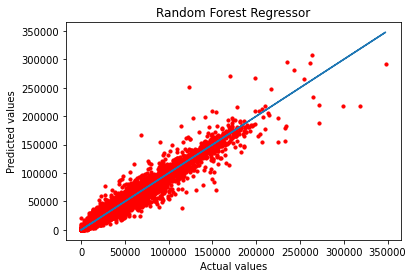

In [32]:
plt.figure()
plt.plot(y_test, y_test)
plt.scatter(y_test, y_pred, s=10, c="red")
plt.title("Random Forest Regressor")
plt.xlabel("Actual values") #blue line
plt.ylabel("Predicted values") #red dots
plt.show()

In [33]:
print('Mean Absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error:', math.sqrt(mean_squared_error(y_test, y_pred)))
print('Accuracy:', rf_reg.score(X_test, y_test)*100)

Mean Absolute error: 1392.6831936424092
Mean Squared error: 10635606.667038336
Root Mean Squared error: 3261.227785211934
Accuracy: 97.87284225706739


In [34]:
# Using Random Forest(Low RMSE and high accuracy) to predict values for unknown dataset(test dataset)
predicted_values_of_test_set = rf_reg.predict(test_X)

In [ ]:
# Saving it in a csv file
temp_frame = pd.DataFrame(predicted_values_of_test_set)
temp_frame.to_csv('Predicted_values_using_RF.csv')